# AI-Powered Marketing Programme
## A Program by IIM Calcutta and TalentSprint
### Assignment : K-means Clustering Algorithm

## Learning Objectives

   
  At the end of the experiment, you will be able to understand:
    
  * Clustering technique
  * Elbow method and wcss to decide the number of clusters
  * K-means clustering algorithm

### Dataset Description



The notebook is on top of Survey dataset which consist of 14 columns(Topics) including an 'ID' column having the data of 68 individuals who gave the rating(out of 10) for classes conducted on various topics and they are:
1. Math
2. AIMLSessions
3. GradientDescent
4. Overfitting
5. RSessions
6. RegClassProblems
7. PackagesR
8. Parameters
9. RScriptRegression
10.AIMLProblems
11.HandleR
12.BeyondRClass
13.Data 

  

### Task

The Survey dataset consist of the individual ratings(out of 10) for the different classes conducted. The task for this experiment is to build a model that clusters the students based on ratings of the participants.

## Information

Clustering is one of the most common exploratory data analysis technique used to get an intuition about the structure of the data. It can be defined as the task of identifying subgroups in the data such that data points in the same subgroup (cluster) are very similar while data points in different clusters are very different. In other words, we try to find homogeneous subgroups within the data such that data points in each cluster are as similar as possible according to a similarity measure such as euclidean-based distance or correlation-based distance. The decision of which similarity measure to use is application-specific.

Clustering is considered an unsupervised learning method since we don’t have the ground truth to compare the output of the clustering algorithm to the true labels to evaluate its performance. We only want to try to investigate the structure of the data by grouping the data points into distinct subgroups.
Here, we will cover **K-means clustering** which is considered as one of the most used clustering algorithms due to its simplicity.


### Setup Steps:

In [ ]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "P21L01E_test " #@param {type:"string"}

In [ ]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "9809876540" #@param {type:"string"}

In [ ]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython
from warnings import filterwarnings
filterwarnings('ignore')

ipython = get_ipython()
  
notebook= "K_means_Clustering" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch") 

    ipython.magic("sx wget !wget https://cdn.iisc.talentsprint.com/DLFA/Experiment_related_data/Survey.csv")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None
    
    elif getAnswer1() and getAnswer2() and getComplexity() and getAdditional() and getConcepts() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer1" : Answer1, "answer2" : Answer2, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}
      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:        
        print(r["err"])
        return None   
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://dlfa.iisc.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if not Additional: 
      raise NameError
    else:
      return Additional  
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None
  
  
# def getWalkthrough():
#   try:
#     if not Walkthrough:
#       raise NameError
#     else:
#       return Walkthrough
#   except NameError:
#     print ("Please answer Walkthrough Question")
#     return None
  
def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None
  

def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer1():
  try:
    if not Answer1:
      raise NameError 
    else: 
      return Answer1
  except NameError:
    print ("Please answer Question 1")
    return None

def getAnswer2():
  try:
    if not Answer2:
      raise NameError 
    else: 
      return Answer2
  except NameError:
    print ("Please answer Question 2")
    return None
  

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup() 
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully



### Import required libraries and packages

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
from matplotlib import pyplot as plt

### Loading the dataset

In [ ]:
dataset = pd.read_csv('/content/Survey.csv')

#### If there are missing values, handle the missing data

In [ ]:
# Dropping the rows or data samples with missing values
dataset.dropna(inplace=True)

#### Removing 'Id' column as it is just an identifier and it does not have a significance in clustering.

In [ ]:
X = dataset.values[:, 1:] 

#### Defining a function to cluster the given data using k-means algorithm.

In [ ]:
def kmeans_train(data, n_clusters):
    kms = KMeans(n_clusters=n_clusters, random_state=0)
    kms = kms.fit(data)
    return kms.inertia_  

The above function returns `kms.inertia_` which is a metric to evaluate clustering. The lower the inertia(WCSS), better the clustering. 

It is calculated as sum over square of distances from each point to its corresponding centroid.


#### Calculating **wcss(Within-Cluster-Sum-of-Squares)** 
One primary and significant fact about k-Means is that it requires prior knowledge or assumption about number of clusters. How can we know beforehand what’s right number of clusters for given data and business problem? 

The number of clusters that we choose for a given dataset cannot be random. Each cluster is formed by calculating and comparing the distances of data points within a cluster to its centroid. So, an implicit objective function in k-Means measures sum of distances of observations from their cluster centroids, called Within-Cluster-Sum-of-Squares (WCSS) or inertia. This is computed as:

$$WCSS = \sum (X_{i} - Y_{i})^{2}$$

where $Y_{i}$ is centroid for observation $X_{i}$.

This is geared towards maximizing number of clusters, and in limiting case each data point becomes its own cluster centroid. 

Moreover, here the idea is to "***minimise the sum***". ***Suppose there are n observation in a given dataset and we specify n number of clusters (k = n) then WCSS will become zero since data points themselves will act as centroids and the distance will be zero and ideally this forms a perfect cluster***, ***however this doesn’t make any sense as we have as many clusters as the observations***. Thus there exists a threshold value for K which we can find using the Elbow point graph plotted below.

In [ ]:
wcss = []
# We cluster the same dataset multiple times with different number of clusters(1-49) and obtain WCSS for each of these attempts to cluster.
for n in range(1, 50):
    # Calling the kmeans_train function and passing the data as X for n number of iterations.
    w = kmeans_train(X, n)
    wcss.append(w)

C:\Users\Raghava\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


#### Plotting WCSS vs number of clusters

We can find the optimum value for K using an Elbow point graph method. We randomly initialise the K-Means algorithm for a range of K values and will plot it against the WCSS for each K value.

The resultant graph is shown below:

Text(0, 0.5, 'WCSS')

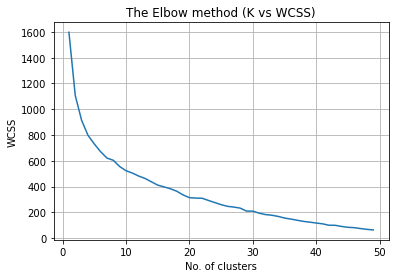

In [ ]:
plt.plot(range(1, 50), wcss)
plt.grid(True)
plt.title('The Elbow Curve (K vs WCSS)')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')

For the above-given graph, the optimum value for K would be 6. As we can see that with an increase in the number of clusters the WCSS value decreases. We select the value for K on the basis of the rate of decrease in WCSS. For example, from cluster 1 to 2, 2 to 4, 4 to 6 in the above graph we see a sudden and huge drop in WCSS. After 6, the drop is minimal and hence we chose **k = 6** to be the optimal value.

#### K-Means Clustering Algorithm

**Kmeans algorithm** is an iterative algorithm that tries to partition the dataset into K pre-defined distinct non-overlapping subgroups (clusters) where each data point belongs to only one group. It tries to make the intra-cluster data points as similar as possible while also keeping the clusters as different (far) as possible. It assigns data points to a cluster such that the sum of the squared distance between the data points and the cluster’s centroid (arithmetic mean of all the data points that belong to that cluster) is at the minimum. The less variation we have within clusters, the more homogeneous (similar) the data points are within the same cluster.

The way kmeans algorithm works is as follows:

1. Select the number K to decide the number of clusters.

2. Select random K points or centroids. (It can be other from the input dataset).

3. Assign each data point to their closest centroid, which will form the predefined K clusters.

4. Calculate the variance and place a new centroid of each cluster.

5. Repeat the third steps, which means reassign each datapoint to the new closest centroid of each cluster.

6. If any reassignment occurs, then go to step-4 else go to FINISH.




Implementing k-means clustering algorithm using sklearn library with number of clusters as 6.

In [ ]:
kms = KMeans(n_clusters=6, random_state=0)
kms = kms.fit(X)

#### Finding the Cluster Centers

The center of the cluster is the average of all points (elements) that belong to that cluster. K-means could be used in many problems, for example, if your points are pixels in an image, then the center of the cluster will be a pixel of that image. If your points represent locations (x,y...) in space then the center of the cluster (centroid) will represent a location in the space.

Here, `cluster_centers_` will give the coordinates of cluster centers.


In [ ]:
kms.cluster_centers_

array([[4.11764706, 5.94117647, 5.        , 5.76470588, 6.47058824,
        6.58823529, 6.29411765, 5.82352941, 6.29411765, 5.70588235,
        5.70588235, 5.11764706, 5.82352941],
       [5.06666667, 6.33333333, 6.        , 6.33333333, 6.53333333,
        6.46666667, 6.46666667, 6.33333333, 6.6       , 5.8       ,
        5.86666667, 5.46666667, 3.4       ],
       [3.66666667, 5.5       , 4.33333333, 5.11111111, 5.83333333,
        6.        , 4.83333333, 5.16666667, 5.77777778, 5.22222222,
        4.66666667, 3.61111111, 2.55555556],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 2.        , 1.        , 1.        , 2.        ,
        1.        , 1.        , 2.        ],
       [3.        , 5.11111111, 3.44444444, 3.44444444, 5.55555556,
        6.        , 4.88888889, 4.88888889, 5.55555556, 5.44444444,
        4.55555556, 4.33333333, 6.44444444],
       [3.14285714, 3.42857143, 2.14285714, 3.14285714, 4.        ,
        4.14285714, 4.     

Finally, let us have a glance at the values clustered in all 6 clusters.

In [ ]:
# Print Id's

In [ ]:
for i in range(6):
    print("Cluster: {}, points: {}".format(i, X[kms.labels_ == i]))

Cluster: 0, points: [[3 6 5 5 7 7 7 5 7 6 6 6 5]
 [6 6 5 5 6 6 5 6 5 6 5 6 6]
 [4 6 5 7 6 7 7 4 6 5 5 3 7]
 [4 6 5 5 6 6 6 6 6 4 5 5 5]
 [4 6 4 6 7 7 6 6 6 6 6 6 6]
 [3 5 2 6 7 7 6 6 6 5 6 4 5]
 [5 6 5 6 6 7 7 6 6 5 6 4 5]
 [4 6 5 5 7 7 7 6 6 5 5 4 5]
 [6 5 6 6 5 6 6 5 6 6 5 6 6]
 [4 6 5 5 7 7 6 6 7 6 6 4 5]
 [5 7 6 6 7 7 6 6 7 7 6 5 7]
 [4 5 5 5 6 6 6 6 6 6 6 5 5]
 [2 7 6 7 7 6 7 6 7 6 6 6 6]
 [2 6 5 6 6 6 5 6 6 6 6 5 6]
 [4 6 7 7 6 7 6 5 6 6 5 7 6]
 [5 5 3 5 7 6 7 7 7 5 6 4 7]
 [5 7 6 6 7 7 7 7 7 7 7 7 7]]
Cluster: 1, points: [[6 7 6 6 7 7 6 7 6 6 6 6 4]
 [6 6 6 6 7 6 6 6 6 5 6 6 4]
 [3 6 6 6 7 7 6 6 7 6 6 5 4]
 [4 6 6 5 7 6 7 7 7 6 7 7 4]
 [6 6 6 6 6 6 7 7 7 5 6 6 3]
 [4 6 6 6 6 7 7 6 7 7 7 5 4]
 [7 7 6 7 7 7 7 7 7 7 7 6 2]
 [6 6 6 7 6 7 6 5 7 6 5 4 5]
 [3 6 5 6 6 6 6 6 6 5 5 7 2]
 [5 6 6 6 6 7 7 7 7 5 5 6 5]
 [5 7 6 7 7 6 7 6 6 6 6 5 2]
 [7 7 5 6 6 6 6 6 6 6 5 5 4]
 [5 6 6 7 6 6 6 6 6 6 6 5 1]
 [5 7 7 7 7 7 6 7 7 6 6 5 5]
 [4 6 7 7 7 6 7 6 7 5 5 4 2]]
Cluster: 2, points: [[5 6 4 4 

**Final Observation** : From the above 6 clusters we can observe that after applying K-means clustering algorithm on the data, 6 clusters are being created with different values of the attributes assigned to different clusters. 

### Please answer the questions below:




In [ ]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [ ]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "" #@param {type:"string"}


In [ ]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "" #@param ["","Yes", "No"]


In [ ]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]
